# Practical 1: Fundamentals of Remote Sensing and Digital Image Processing

In this practical, we'll exercise the fundamentals of remote sensing (radiation, transmission, etc). We'll also learn how to do some image processing using Python's [scikit-image](https://scikit-image.org) library.

## General instructions

Type out your answer to questions in the provided *Markdown* cell (delete the placeholder text). 
You can use the code cells provided to do the calculations.

Remember: 
* Double click on a Markdown cell to edit its contents.
* You can write equations in Markdown by surrounding them in `$`. The syntax for the equations is from a program called [LaTeX](https://en.wikipedia.org/wiki/LaTeX). You can learn about the syntax for writing equations with [this guide](https://www.overleaf.com/learn/latex/Mathematical_expressions).
* To get a cheat sheet of Markdown formatting, click on the menu: Help > Markdown Reference.
* Use descriptive variable names.
* Use the `print` function to display the contents of a variable.
* **Be mindful of units!**

Example equation:

$
\lambda = \dfrac{c}{\nu} = 10\ \mu m
$

## Exercise 1

When green light is emitted from an oxygen atom it has a wavelength of 558 nm. 
What is its frequency in [Hertz](https://en.wikipedia.org/wiki/Hertz)?

---

In [1]:
wavelength = 558 * 10**-9  # Convert from nm to m
speed_of_light = 3 * 10**8  # m/s
frequency = speed_of_light / wavelength  # in 1/s = Hertz
print(frequency, "Hertz")
# Use scientific notation with 2 decimal places using string formatting
# https://docs.python.org/3.8/library/string.html#formatstrings
print("{:.2e} Hertz".format(frequency))

537634408602150.56 Hertz
5.38e+14 Hertz


We know that the frequency $\nu = \dfrac{c}{\lambda}$, in which $c$ is the speed of light and $\lambda$ is the wavelength. So the frequency of green light emitted by an oxygen atom is $5.38\ 10^{14}$ Hertz.

## Exercise 2

Combustion of vegetation occurs at temperatures between 540-700 K.

1. What wavelength(s) will be needed to monitor the fires with a suitable remote sensor?
1. Compute the energy (total spectral radiance) emitted by a blackbody at that temperature (present your answer in $W.m^{-2}$).
1. Could a sensor on a satellite measure this effect? Explain your answers.

---

#### Solution to question 1


In [2]:
temperature_range = [540, 700]  # K
wien_displacement_constant = 2.897771955 * 10**-3  # m.K
for temperature in temperature_range:
    peak_wavelength = wien_displacement_constant / temperature * 10**6 # micrometer
    print("Peak wavelength for temperature", temperature, "K: {:.2f} micrometers".format(peak_wavelength))

Peak wavelength for temperature 540 K: 5.37 micrometers
Peak wavelength for temperature 700 K: 4.14 micrometers


Assuming that the emission of radiated energy from the combustion of vegetation can be approximated by the emission from an ideal blackbody, we can calculate the wavelength at which burning vegetation will emit the largest amount of energy using [Wien's
displacement law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law):

$\lambda_{max} = \dfrac{A}{T}$

in which $A = 2.897771955 \times 10^{-3}\ m.K$ is Wien's displacement constant and $T$ is the temperature. Using this equation, we calculate that a suitable remote senson will need to monitor radiation between $4.14\ \mu m$ and $5.37\ \mu m$.

#### Solution to question 2


In [3]:
stefan_boltzmann_constant = 5.670373 * 10**-8  # W m^-2 K^-4
for temperature in temperature_range:
    total_spectral_radiance = stefan_boltzmann_constant * temperature**4  # W m^-2 
    print("Total spectral radiance for temperature", temperature, "K: {:.2e} W.m^-2".format(total_spectral_radiance))

Total spectral radiance for temperature 540 K: 4.82e+03 W.m^-2
Total spectral radiance for temperature 700 K: 1.36e+04 W.m^-2


The range of energy emitted of a black body at that temperature range can be calculated using the [Stephan-Boltzmann equation](https://en.wikipedia.org/wiki/Stefan%E2%80%93Boltzmann_law):

$B_{bb} = \sigma T^4$

in which $\sigma = 5.670373 \times 10^{-8}\ W.m^{-2}.K^{-4}$ is the Stefan-Boltzmann constant. The energe emitted will be in the range $4.82 \times 10^3\ W.m^{-2}$ and $1.36 \times 10^4\ W.m^{-2}$.

#### Solution to question 3

A satellite sensor operating between 4.14 and 5.36 $\mu m$ will record the radiant energy of the combustion because the atmosphere is partially transparent in the thermal infrared band (see Figure 1 below). The atmosphere is not perfectly transparent in the shorter wavelengths of this range (between 4.14 and 4.35 $\mu m$) so some energy will be not be detected.

[![This figure is in the public domain](https://upload.wikimedia.org/wikipedia/commons/1/1c/Atmosfaerisk_spredning.png)](https://commons.wikimedia.org/wiki/File:Atmosfaerisk_spredning.png)

*Figure 1: Transmittance of the atmostphere with absorbing molecules indicated. Source https://commons.wikimedia.org/wiki/File:Atmosfaerisk_spredning.png in the public domain.*

## Exercise 3

A full [Landsat 7](https://en.wikipedia.org/wiki/Landsat_7) satellite scene covers a large area (185 km x 172 km). 
For a spatial resolution of 30 m (e.g. bands 1 and 4), calculate approximately how much computer memory will be required to store a single band?

---

In [4]:
scene_width = 185000  # m
scene_height = 172000  # m
resolution = 30  # m
# Calculate the number of pixels in both dimensions
# The // indicated integer division (not considering decimal places)
pixels_width = scene_width // resolution
pixels_height = scene_height // resolution
number_of_pixels = pixels_height * pixels_width
print("Total number of pixels:", number_of_pixels)
# Assume that images are enconded in 8 bits
memory_per_pixel = 1  # byte = 8 bits
memory_total = memory_per_pixel * number_of_pixels / 10**6  # Convert from byte to Megabyte
print("Total memory (assuming 8-bit enconding):", memory_total, "Mb")

Total number of pixels: 35349678
Total memory (assuming 8-bit enconding): 35.349678 Mb


We can calculate the number of pixels in each dimension of the image by dividing the size of the scene in that dimension by the resolution. The total number of pixels will be the multiplication of the number of pixels in each dimension. Assuming that the image is enconded in 8 bits (1 byte), we can calculate the size of the image by multiplying the size per pixel (1 byte) by the number of pixels: ~35 Mb.

## Exercise 4

In the following exercise, we will do some digital image processing in Python:

* How to load/read an image
* How to display it
* How to alter the radiometric information via histogram enhancements

### Loading and plotting an image

In the last Python class, we saw how to load data from a text file using [numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) and how to plot it using [matplotlib](https://matplotlib.org/).
This time, we'll look at how to load an actual image in [TIFF](https://en.wikipedia.org/wiki/TIFF) format using [scikit-image](https://scikit-image.org).

Complete the code cell below to:
1. Load the file `moon.tif` into a numpy array
2. Plot it using matplotlib

Remember to:
* Run the cell with the `import` commands. 
* Use *tab* to complete variables, functions, and even file names.

In [5]:
import skimage
# We can use "as" to give the import a nickname (so we don't have to type the long name)
import matplotlib.pyplot as plt
import numpy as np

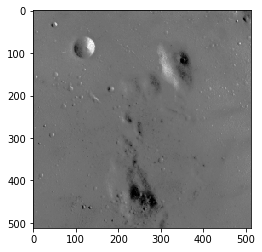

In [6]:
moon = skimage.io.imread("moon.tif")

plt.figure()
plt.imshow(moon, cmap="gray")
plt.show()

### Histogram enhancements

Contrast enhancement techniques for grayscale (single band) images:

1. Contrast stretching: increases the contrast of the image by mapping the intensity values of the input image to a new range of values (usually shorter than the original). Function: [skimage.exposure.rescale_intensity](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity)
2. Histogram equalization: enhances the contrast of images by transforming the intensity values of an image so that the histogram of the output image approximately matches a specified distribution (for example, a uniform distribution). Function: [skimage.exposure.equalize_hist](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_hist)
3. Adaptive histogram equalization: operates on small data regions (tiles) rather than the entire image. Each tile's contrast is enhanced so that the histogram of each output region approximately matches the specified distribution. Function: [skimage.exposure.equalize_adapthist](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_adapthist)

These enhancements are used to aid the *visualization* of images. Be careful to always preserve the original and communicate that you have processed the images. The enhanced versions are usually not suitable for quantitative analysis (why is that?).


#### Step 1

First, plot a histogram of the original image using [plt.hist](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html):

> Tip: You will need to collapse the image into a 1D array of values. Call the `.ravel()` method of the array to do this. Ex: `myarray.ravel()`.
>
> Tip: Use a larger number of bins than the default by specifying the `bins` parameter to `plt.hist`.

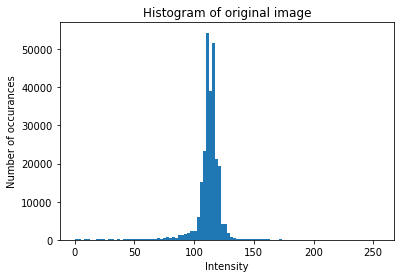

In [7]:
plt.figure()
plt.title("Histogram of original image")
plt.hist(moon.ravel(), bins=100)
plt.xlabel("Intensity")
plt.ylabel("Number of occurances")
plt.show()

#### Step 2

Calculate the 3 types of histogram enhancements for the image. Plot the enhanced images along with their respective histograms.

> BONUS: Plot each image and histogram side-by-side using [plt.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html)

In [8]:
# The first one is a bit trickier. 
# If we want to stretch the contrast so that 2% of the data are saturated in the low and high ends,
# we need to first compute the values in the 2nd and 98th percentile of the image first.
low_end, high_end = np.percentile(moon, (2, 98))
moon_rescale = skimage.exposure.rescale_intensity(moon , in_range=(low_end, high_end))

In [9]:
moon_eq = skimage.exposure.equalize_hist(moon)

In [10]:
# With adative equalization you can set a limit to the equalization 
# to avoid amplifying noise too much. Try passing the clip_limit argument to this function.
# It should be between 0 and 0.1.
moon_adap_eq = skimage.exposure.equalize_adapthist(moon, clip_limit=0.03)

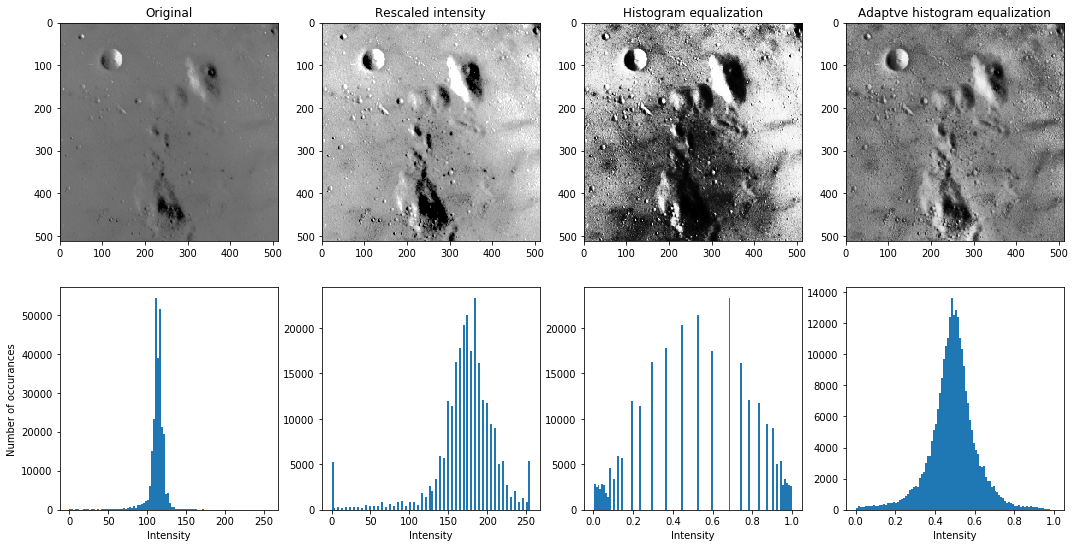

In [11]:
# Plot the images and their respective histograms
plt.figure(figsize=(18, 9))
# Plot the images in the first row
plt.subplot(2, 4, 1)
plt.title("Original")
plt.imshow(moon, cmap="gray")
plt.subplot(2, 4, 2)
plt.title("Rescaled intensity")
plt.imshow(moon_rescale, cmap="gray")
plt.subplot(2, 4, 3)
plt.title("Histogram equalization")
plt.imshow(moon_eq, cmap="gray")
plt.subplot(2, 4, 4)
plt.title("Adaptve histogram equalization")
plt.imshow(moon_adap_eq, cmap="gray")
# Plot the histograms in the second row
plt.subplot(2, 4, 5)
plt.hist(moon.ravel(), bins=100)
plt.xlabel("Intensity")
plt.ylabel("Number of occurances")
plt.subplot(2, 4, 6)
plt.hist(moon_rescale.ravel(), bins=100)
plt.xlabel("Intensity")
plt.subplot(2, 4, 7)
plt.hist(moon_eq.ravel(), bins=100)
plt.xlabel("Intensity")
plt.subplot(2, 4, 8)
plt.hist(moon_adap_eq.ravel(), bins=100)
plt.xlabel("Intensity")
plt.show()

#### Step 3

Comment on similarities, differences, and overall performance of the image digital enhancement methods.

---

Rescaling the intensity caused a drastic change in the image, saturating the white and black extremes. 
Comparing the histograms of the original and rescaled images, we can see that the intensity values in the middle are represented by a wider range of shades of gray.
This contributes to making the small craters easier to discern in the rescaled image.

Histogram equalization substantially changed the image by spreading the intensity values across the entire histogram. 
Some previously hidden features are exposed, like the elevation causing a large shadow to the right of the crater on the bottom of the image.
The changes are slightly too intense, obscuring some details in the bottom of the image where the black values are saturated.
This indicates that portions of the image require different levels of histogram equalization.

Adaptive histogram equalization accomplishes this by applying the equalization to chunks of the image independently.
Comparing the histogram of adative vs non-adative equalization, the adative version has intensity spread out in the entire range with a peak in the middle gray.
On the other hand, the non-adaptive equalization results is chunks of intensity at discrete values with a larger concentration in the extremes (white and black).
In the image treated with adaptive histogram equalization, we can see all of the small craters in detail while retaining the contrast in the larger craters.